In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def System(r,t,lambA=0.5, lambB =0.3 ,):
    
    Na, Nb, Nc = r
    
    dNadt = -lambA*Na
    dNbdt = lambA*Na-lambB*Nb
    dNcdt = lambB*Nb
    
    return np.array([dNadt, dNbdt, dNcdt])

In [3]:
t = np.linspace(0,10,50)
r0 = np.array([500,0., 0.])

In [4]:
# Solucion con odeint
sol = odeint(System, r0, t)

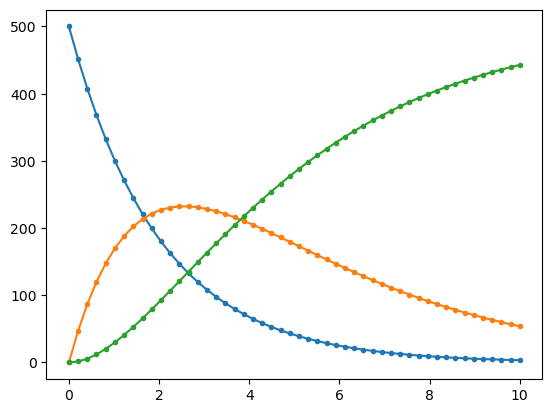

In [5]:
plt.plot(t,sol[:,0],marker='.')
plt.plot(t,sol[:,1],marker='.')
plt.plot(t,sol[:,2],marker='.')

In [6]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1], r[2]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],r[2]+0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

In [7]:
def Adaptativo(f,x0,t):
    
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    
    r = r0
    tolerancia = 0.01
    
    Time = np.array([t])
    Vector = r
    
    Steps = np.array([h])
    
    while t < tf:
       
        
        r1 = Increment(f,r,t,h) # es un vector
        r2 = Increment(f,r,t+h,h)
        rt = Increment(f,r,t,2*h)
        
        deltas = r1.copy()
        ht = r1.copy()
                
        error = np.linalg.norm(r2-rt)
        print(t, error)

        if error < tolerancia:
            h = 2*h 
            t+=h
            r = rt
            Vector = np.vstack((Vector,r))
            Time = np.append(Time,t)
            
        
        q = 0.85*(tolerancia/error)**(1/4)
        h = q*h


        Steps = np.append(Steps,h)
            
    return Time,Vector,Steps        
        
    

In [8]:
r0 = np.array([500,0., 0.])
t1,x1,h1 = Adaptativo(System,r0,t)
print(len(t1), len(x1))

0.0 59.23417162898478
0.0 6.857528688358897
0.0 1.1575005404069227
0.0 0.3006699500350492
0.0 0.10919833426210306
0.0 0.05106820414851606
0.0 0.02887742388292025
0.0 0.018829977302312288
0.0 0.013663515736281067
0.0 0.010742225644098475
0.0 0.008968953090800022
5.0737315347683485e-05 0.015666893461394625
5.0737315347683485e-05 0.011903114233535114
5.0737315347683485e-05 0.00968650332408474
0.00010553572384530496 0.016597796947442584
0.00010553572384530496 0.0124297316842906
0.00010553572384530496 0.010006176150887832
0.00010553572384530496 0.008503972225251502
0.00015364588368663553 0.015053721224665867
0.00015364588368663553 0.011551969198019355
0.00015364588368663553 0.009471383780956282
0.00020723087214253346 0.016320582899389525
0.00020723087214253346 0.012273700537282876
0.00020723087214253346 0.009911819783681108
0.0002633096781677329 0.016886505392375392
0.0002633096781677329 0.012591541701758996
0.0002633096781677329 0.010103714992807333
0.0002633096781677329 0.0085660692891880

0.004172227295467732 0.00992542887714661
0.004228528011263507 0.0169038881326222
0.004228528011263507 0.012601262261941436
0.004228528011263507 0.01010956469408217
0.004228528011263507 0.008569788754137143
0.004277140629840263 0.015141011708196995
0.004277140629840263 0.011602173273563504
0.004277140629840263 0.009502239184251346
0.004331044469092274 0.016360438428088035
0.004331044469092274 0.012296174286240929
0.004331044469092274 0.009925428853092723
0.0043873509966174205 0.016903888007937577
0.0043873509966174205 0.012601262207165884
0.0043873509966174205 0.01010956466803975
0.0043873509966174205 0.00856978874122777
0.004435968633510948 0.015141011616080663
0.004435968633510948 0.011602173231916478
0.004435968633510948 0.009502239164186589
0.004489878037447051 0.016360438314286945
0.004489878037447051 0.012296174235850423
0.004489878037447051 0.00992542882906746
0.004546190377879648 0.016903887883211965
0.004546190377879648 0.012601262152334586
0.004546190377879648 0.01010956464194

KeyboardInterrupt: 

46556 46556


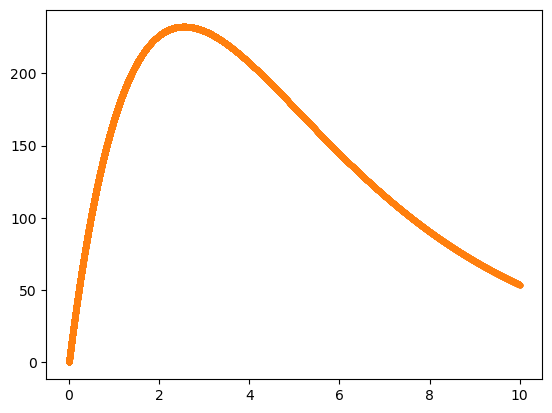

In [ ]:
plt.plot(t,sol[:,1],marker='.')
print(len(t1), len(x1))
plt.plot(t1,x1[:,1],marker='.')

46556 46556


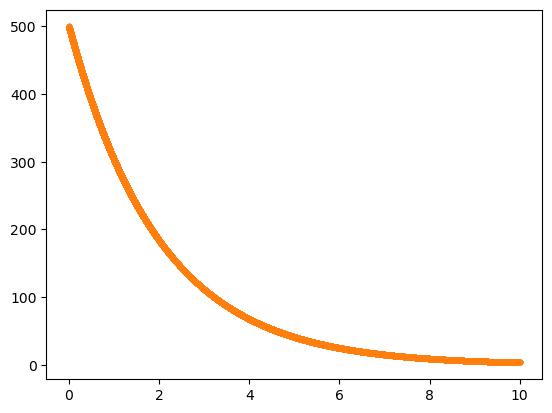

In [ ]:
plt.plot (t,sol[:,0],marker='.')
print(len(t1), len(x1))
plt.plot(t1,x1[:,0],marker='.')

46556 46556


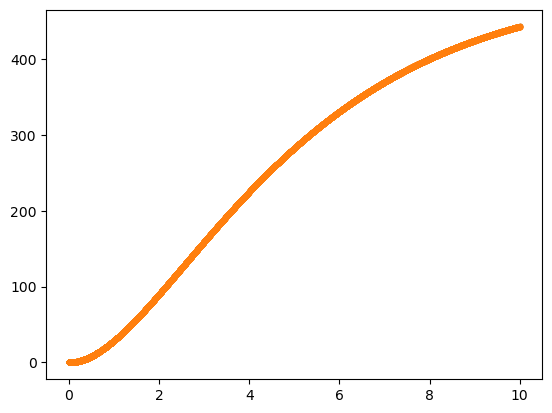

In [ ]:
plt.plot(t,sol[:,2],marker='.')
print(len(t1), len(x1))
plt.plot(t1,x1[:,2],marker='.')

In [ ]:
# Particulas de B maxima 

max = np.max(x1[:,1])
maxTime = 0 
index = -1
for i in range(0, len(t1)): 
    
    if x1[i][1] == max: 
        maxTime = t1[i]
        index = i
print(maxTime, index)



2.5541270254601405 25076


In [ ]:
# Cuantas particulas en B y C hay??? 
maxB = x1[index][1]
maxC = x1[index][2]
print(maxB, maxC)

232.37900077242514 128.19352254123382
